In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('reg_house_data.csv')

In [6]:
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
df.shape

(20121, 21)

In [8]:
num_features = ['bedrooms', 'bathrooms', 'sqft_living', 'floors']
cat_features = ['yr_built', 'condition']

In [10]:
x = df[[*num_features, *cat_features]]
y = df['price']

In [11]:
x.head()

,bedrooms,bathrooms,sqft_living,floors,yr_built,condition
0,3,1.00,1180,1.0,1955,3
1,3,2.25,2570,2.0,1951,3
2,2,1.00,770,1.0,1933,3
3,4,3.00,1960,1.0,1965,5
4,3,2.00,1680,1.0,1987,3


In [12]:
y

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
20116    360000.0
20117    400000.0
20118    402101.0
20119    400000.0
20120    325000.0
Name: price, Length: 20121, dtype: float64

In [16]:
x.yr_built.value_counts().sort_index()

yr_built
1900     80
1901     28
1902     24
1903     45
1904     43
       ... 
2011    123
2012    161
2013    177
2014    492
2015     31
Name: count, Length: 116, dtype: int64

In [17]:
x.condition.value_counts()

condition
3    13072
4     5338
5     1512
2      170
1       29
Name: count, dtype: int64

In [18]:
x['decade_built'] = x.yr_built.apply(lambda x:(x - 1900)//10)

/tmp/ipykernel_19427/2606667311.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['decade_built'] = x.yr_built.apply(lambda x:(x - 1900)//10)


In [20]:
x.decade_built.value_counts()

decade_built
10    3165
6     2539
5     2326
7     2187
8     2148
9     2044
4     1702
11    1122
2     1097
1      745
0      579
3      467
Name: count, dtype: int64

In [21]:
x.drop('yr_built', axis = 1, inplace = True)

/tmp/ipykernel_19427/2143996895.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.drop('yr_built', axis = 1, inplace = True)


In [22]:
x.head()

,bedrooms,bathrooms,sqft_living,floors,condition,decade_built
0,3,1.00,1180,1.0,3,5
1,3,2.25,2570,2.0,3,5
2,2,1.00,770,1.0,3,3
3,4,3.00,1960,1.0,5,6
4,3,2.00,1680,1.0,3,8


# Linear model

In [23]:
from sklearn.preprocessing import OneHotEncoder

In [27]:
ohe = OneHotEncoder(sparse_output = False)

In [28]:
encoded_features = pd.DataFrame(ohe.fit_transform(x[['condition', 'decade_built']]))

In [29]:
encoded_features

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20116,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
20117,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
20118,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
20119,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [30]:
ohe.categories_

[array([1, 2, 3, 4, 5]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])]

In [36]:
condition_cols = [f'condition_{col}' for col in ohe.categories_[0]] 
decade_built_cols = [f'dec_built_{col}' for col in ohe.categories_[1]] 

In [37]:
dummy_col_names = [*condition_cols, *decade_built_cols]

encoded_features.columns = dummy_col_names

In [38]:
encoded_features

,condition_1,condition_2,condition_3,condition_4,condition_5,dec_built_0,dec_built_1,dec_built_2,dec_built_3,dec_built_4,dec_built_5,dec_built_6,dec_built_7,dec_built_8,dec_built_9,dec_built_10,dec_built_11
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20116,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
20117,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
20118,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
20119,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [39]:
x

,bedrooms,bathrooms,sqft_living,floors,condition,decade_built
0,3,1.00,1180,1.0,3,5
1,3,2.25,2570,2.0,3,5
2,2,1.00,770,1.0,3,3
3,4,3.00,1960,1.0,5,6
4,3,2.00,1680,1.0,3,8
...,...,...,...,...,...,...
20116,3,2.50,1530,3.0,3,10
20117,4,2.50,2310,2.0,3,11
20118,2,0.75,1020,2.0,3,10
20119,3,2.50,1600,2.0,3,10


In [41]:
x.drop(['condition', 'decade_built'], axis = 1, inplace = True)

/tmp/ipykernel_19427/289560835.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.drop(['condition', 'decade_built'], axis = 1, inplace = True)


In [42]:
x = pd.concat([x, encoded_features], axis = 1)

In [43]:
x

,bedrooms,bathrooms,sqft_living,floors,condition_1,condition_2,condition_3,condition_4,condition_5,dec_built_0,...,dec_built_2,dec_built_3,dec_built_4,dec_built_5,dec_built_6,dec_built_7,dec_built_8,dec_built_9,dec_built_10,dec_built_11
0,3,1.00,1180,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3,2.25,2570,2.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,1.00,770,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,3.00,1960,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,3,2.00,1680,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20116,3,2.50,1530,3.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
20117,4,2.50,2310,2.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
20118,2,0.75,1020,2.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
20119,3,2.50,1600,2.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# Train test split

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .33, random_state = 10)

In [49]:
x_train.shape

(13481, 21)

In [50]:
x_test.shape

(6640, 21)

# Normalize the data

In [51]:
x_train.head(10)

,bedrooms,bathrooms,sqft_living,floors,condition_1,condition_2,condition_3,condition_4,condition_5,dec_built_0,...,dec_built_2,dec_built_3,dec_built_4,dec_built_5,dec_built_6,dec_built_7,dec_built_8,dec_built_9,dec_built_10,dec_built_11
6765,4,3.00,2800,2.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
12296,3,2.25,1650,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6973,3,2.75,1750,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8267,3,2.25,1480,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
19082,3,2.00,1220,3.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2220,3,2.25,2070,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9122,3,1.75,1510,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
11765,3,2.25,2070,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
13560,5,3.00,3850,2.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4224,3,2.00,2360,2.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [53]:
from sklearn.preprocessing import MinMaxScaler

In [54]:
scaler = MinMaxScaler()

In [55]:
scaler.fit(x_train[num_features])

,feature_range,"(0, ...)"
,copy,True
,clip,False


In [56]:
x_train[num_features] = scaler.transform(x_train[num_features])
x_test[num_features] = scaler.transform(x_test[num_features])

# Build a model

In [57]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error as mse

In [58]:
reg = LinearRegression()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)

In [60]:
mse(y_test, y_pred)

20790299181.12066

In [61]:
test_error = mse(y_test, y_pred)

In [62]:
y_test.mean()

np.float64(467471.42078313255)

In [63]:
import numpy as np

In [64]:
np.sqrt(test_error)

np.float64(144188.41555797975)

In [65]:
import matplotlib.pyplot as plt
%matplotlib inline

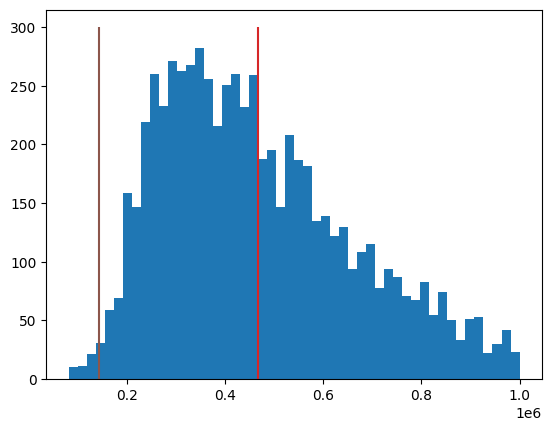

In [83]:
plt.hist(y_test, bins = 50);
plt.vlines(467471.0, 0, 300, 'C3')
plt.vlines(144188.0, 0, 300, 'C5')

In [82]:
y_test

15528    712000.0
1390     250000.0
13776    110000.0
17299    635000.0
9554     950000.0
           ...   
11373    595000.0
1437     900000.0
14635    355000.0
5091     890000.0
19009    734000.0
Name: price, Length: 6640, dtype: float64

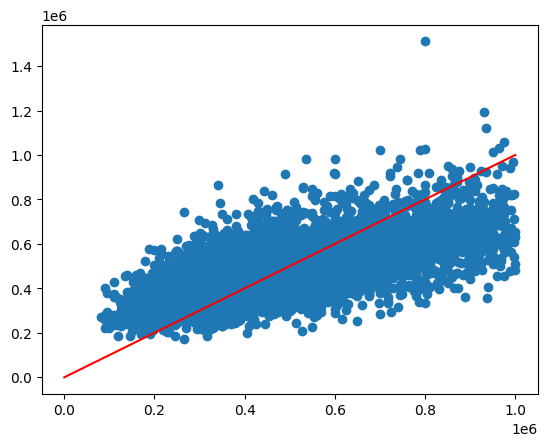

In [86]:
plt.scatter(y_test, y_pred)
plt.plot([0, 1_000_000], [0, 1_000_000], c = 'r')

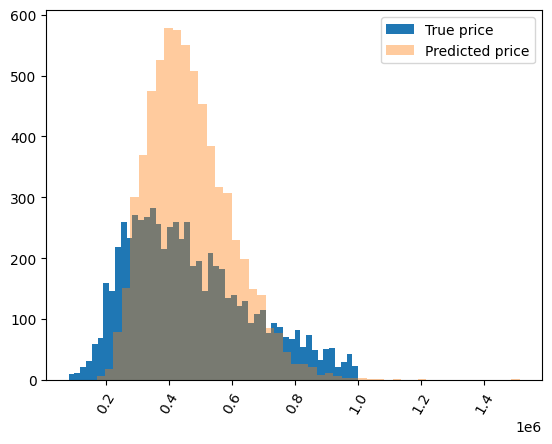

In [92]:
plt.hist(y_test, bins = 50, label = 'True price');
plt.hist(y_pred, bins = 50, label = 'Predicted price', alpha = .4);
plt.legend()
plt.xticks(rotation = 60);

# Train Test Validation

In [93]:
x_train, _, y_train, _ = train_test_split(x, y, test_size = 0.33, random_state = 10)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.33, random_state = 10)

In [95]:
rmse_val = {}

for alpha in np.logspace(-6, 1, 20):
    reg = Ridge(alpha = alpha)
    reg.fit(x_train, y_train)
    y_val_pred = reg.predict(x_val)
    rmse_val[alpha] = np.sqrt(mse(y_val, y_val_pred))

In [97]:
print(min(rmse_val.items(), key = lambda x: x[1]))

(np.float64(1e-06), np.float64(146375.8443215497))


In [94]:
scaler = MinMaxScaler()
scaler.fit(x_train[num_features])

x_train[num_features] = scaler.transform(x_train[num_features])
x_val[num_features] = scaler.transform(x_val[num_features])

In [98]:
rmse_val

{np.float64(1e-06): np.float64(146375.8443215497),
 np.float64(2.335721469090121e-06): np.float64(146375.84450272264),
 np.float64(5.455594781168514e-06): np.float64(146375.84492589257),
 np.float64(1.274274985703132e-05): np.float64(146375.84591430202),
 np.float64(2.9763514416313192e-05): np.float64(146375.8482229637),
 np.float64(6.951927961775606e-05): np.float64(146375.85361542273),
 np.float64(0.0001623776739188721): np.float64(146375.86621107842),
 np.float64(0.000379269019073225): np.float64(146375.8956330578),
 np.float64(0.0008858667904100823): np.float64(146375.96436570905),
 np.float64(0.002069138081114788): np.float64(146376.12496653886),
 np.float64(0.004832930238571752): np.float64(146376.50041453182),
 np.float64(0.011288378916846883): np.float64(146377.3791412096),
 np.float64(0.026366508987303555): np.float64(146379.4411977592),
 np.float64(0.061584821106602544): np.float64(146384.30817908776),
 np.float64(0.14384498882876628): np.float64(146395.9307681724),
 np.float

In [99]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 10)

In [100]:
scaler = MinMaxScaler()
scaler.fit(x_train[num_features])

x_train[num_features] = scaler.transform(x_train[num_features])
x_test[num_features] = scaler.transform(x_test[num_features])

In [101]:
reg = Ridge(alpha = alpha)
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)

In [104]:
#144188 and 144718

In [105]:
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [103]:
np.sqrt(mse(y_test, y_pred))

np.float64(144718.05881870812)